### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [4]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [5]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+"\n")
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [6]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Erosion Function

In [7]:
def erosion3(arr,row,col):
    e_set=np.zeros((row,col),np.int64)
    k_arr=np.full((3,3),255,np.int64)

    padded_img,n_row,n_col= add_padding(arr,row,col,3,3)
    for i in range(row):
        for j in range(col):
            if( padded_img[i,j]==k_arr[1,1] and padded_img[i-1,j-1]==k_arr[0,0] and padded_img[i-1,j]==k_arr[0,1] and padded_img[i-1,j+1]==k_arr[2,0] and padded_img[i,j-1]==k_arr[1,0] and padded_img[i,j+1]==k_arr[1,2] and padded_img[i+1,j-1]==k_arr[2,0] and padded_img[i+1,j]==k_arr[2,1] and padded_img[i+1,j+1]==k_arr[2,2]):
                e_set[i,j]=255
    return e_set

### Dilation Function

In [8]:
def dilation3(arr,row,col):
    d_set=np.zeros((row,col),np.int64)
    k_arr=np.full((3,3),255,np.int64)

    padded_img,n_row,n_col= add_padding(arr,row,col,3,3)
    for i in range(row):
        for j in range(col):
            if( padded_img[i,j]==k_arr[1,1] or padded_img[i-1,j-1]==k_arr[0,0] or padded_img[i-1,j]==k_arr[0,1] or padded_img[i-1,j+1]==k_arr[2,0] or padded_img[i,j-1]==k_arr[1,0] or padded_img[i,j+1]==k_arr[1,2] or padded_img[i+1,j-1]==k_arr[2,0] or padded_img[i+1,j]==k_arr[2,1] or padded_img[i+1,j+1]==k_arr[2,2]):
                d_set[i,j]=255
    return d_set

### Main Function


Enter 1 to apply erosion
Enter 2 to apply dilation 
Enter your choice::  2


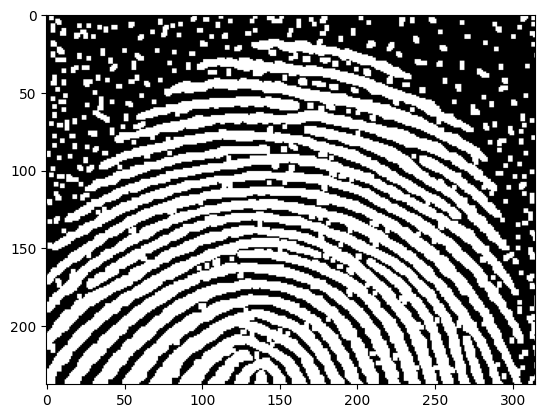

In [17]:
if __name__ == '__main__':
    
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH09\Fig0911(a)(noisy_fingerprint).pgm")
    ch=int(input("\nEnter 1 to apply erosion\nEnter 2 to apply dilation \nEnter your choice:: "))
    if ch==1:
        result=erosion3(k1,row1,col1)
        Write_img("outputs\\erosion_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==2:
        result=dilation3(k1,row1,col1)
        Write_img("outputs\\dilation_img.pgm",result,g1,c1,rc1,max1,col1,row1)